<center>
<img src="/img/CADASA.jpg" />
    
## Adapted from [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 

Author: [Egor Polusmak](https://www.linkedin.com/in/egor-polusmak/). Translated and edited by Alena Sharlo, [Yury Kashnitsky](https://yorko.github.io), [Artem Trunov](https://www.linkedin.com/in/datamove), [Anastasia Manokhina](https://www.linkedin.com/in/anastasiamanokhina/), and [Yuanyuan Pao](https://www.linkedin.com/in/yuanyuanpao/). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

In [83]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# <center>Visual data analysis in Python
## <center>Overview of Seaborn, Matplotlib and Model Interpretation

### Article outline

1. [Dataset](#1.-Dataset)
2. [DataFrame.plot()](#2.-DataFrame.plot)
3. [Seaborn](#3.-Seaborn)
4. [Simpsons_Paradox](#4.-Simpsons_Paradox)
5. [Model_Interpretability](#4.-Model_Interpretability)

## 1. Dataset

First, we will set up our environment by importing all necessary libraries. We will also change the display settings to better show plots.

In [ ]:
# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt

# We will use the Seaborn library
import seaborn as sns
sns.set()

# Graphics in SVG format are more sharp and legible
#%config InlineBackend.figure_format = 'svg' 

# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['image.cmap'] = 'viridis'
import pandas as pd

In [84]:
import os
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/mlcourse.ai-master'

In [ ]:
os.chdir('/content/drive/My Drive/Colab Notebooks/mlcourse.ai-master')

Now, let’s load the dataset that we will be using into a `DataFrame`. I have picked a dataset on video game sales and ratings from [Kaggle Datasets](https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings).
Some of the games in this dataset lack ratings; so, let’s filter for only those examples that have all of their values present.

In [ ]:
df = pd.read_csv('data/video_games_sales.csv').dropna()
print(df.shape)

(6825, 16)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   object 
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


Next, print the summary of the `DataFrame` to check data types and to verify everything is non-null.

We see that `pandas` has loaded some of the numerical features as `object` type. We will explicitly convert those columns into `float` and `int`.

In [ ]:
df['User_Score'] = df['User_Score'].astype('float64')
df['Year_of_Release'] = df['Year_of_Release'].astype('int64')
df['User_Count'] = df['User_Count'].astype('int64')
df['Critic_Count'] = df['Critic_Count'].astype('int64')

The resulting `DataFrame` contains 6825 examples and 16 columns. Let’s look at the first few entries with the `head()` method to check that everything has been parsed correctly. To make it more convenient, I have listed only the variables that we will use in this notebook.

In [ ]:
useful_cols = ['Name', 'Platform', 'Year_of_Release', 'Genre', 
               'Global_Sales', 'Critic_Score', 'Critic_Count',
               'User_Score', 'User_Count', 'Rating'
              ]
df[useful_cols].head()

,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,82.53,76.0,51,8.0,322,E
2,Mario Kart Wii,Wii,2008,Racing,35.52,82.0,73,8.3,709,E
3,Wii Sports Resort,Wii,2009,Sports,32.77,80.0,73,8.0,192,E
6,New Super Mario Bros.,DS,2006,Platform,29.80,89.0,65,8.5,431,E
7,Wii Play,Wii,2006,Misc,28.92,58.0,41,6.6,129,E


## 2. DataFrame.plot()

Before we turn to Seaborn and Plotly, let’s discuss the simplest and often most convenient way to visualize data from a `DataFrame`: using its own `plot()` method.

As an example, we will create a plot of video game sales by country and year. First, let’s keep only the columns we need. Then, we will calculate the total sales by year and call the `plot()` method on the resulting `DataFrame`.

Example of List Comprehension


In [ ]:
[x for x in df.columns if 'Sales' in x]

['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

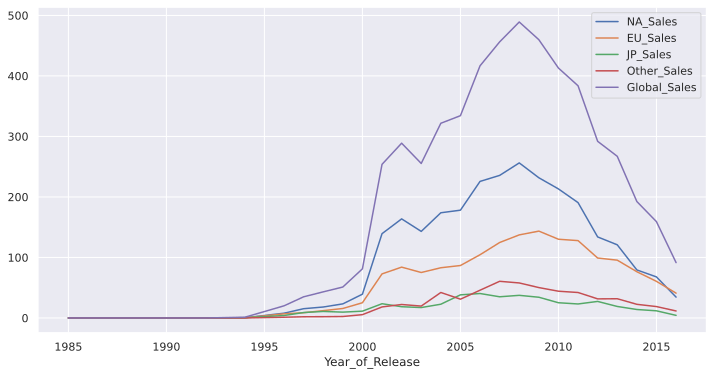

In [ ]:
df[[x for x in df.columns if 'Sales' in x] + 
   ['Year_of_Release']].groupby('Year_of_Release').sum().plot();

Note that the implementation of the `plot()` method in `pandas` is based on `matplotlib`.

Using the `kind` parameter, you can change the type of the plot to, for example, a *bar chart*. `matplotlib` is generally quite flexible for customizing plots. You can change almost everything in the chart, but you may need to dig into the [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) to find the corresponding parameters. For example, the parameter `rot` is responsible for the rotation angle of ticks on the x-axis (for vertical plots):

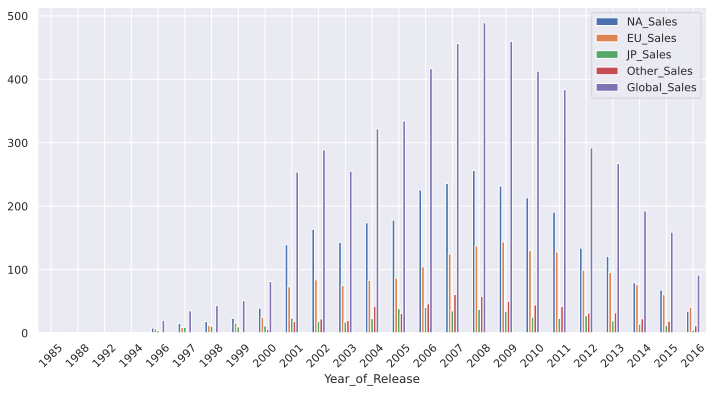

In [ ]:
df[[x for x in df.columns if 'Sales' in x] + 
   ['Year_of_Release']].groupby('Year_of_Release').sum().plot(kind='bar', rot=45);

## 3. Seaborn

Now, let's move on to the `Seaborn` library. `seaborn` is essentially a higher-level API based on the `matplotlib` library. Among other things, it differs from the latter in that it contains more adequate default settings for plotting. By adding `import seaborn as sns; sns.set()` in your code, the images of your plots will become much nicer. Also, this library contains a set of complex tools for visualization that would otherwise (i.e. when using bare `matplotlib`) require quite a large amount of code.

#### pairplot()

Let's take a look at the first of such complex plots, a *pairwise relationships plot*, which creates a matrix of scatter plots by default. This kind of plot helps us visualize the relationship between different variables in a single output.

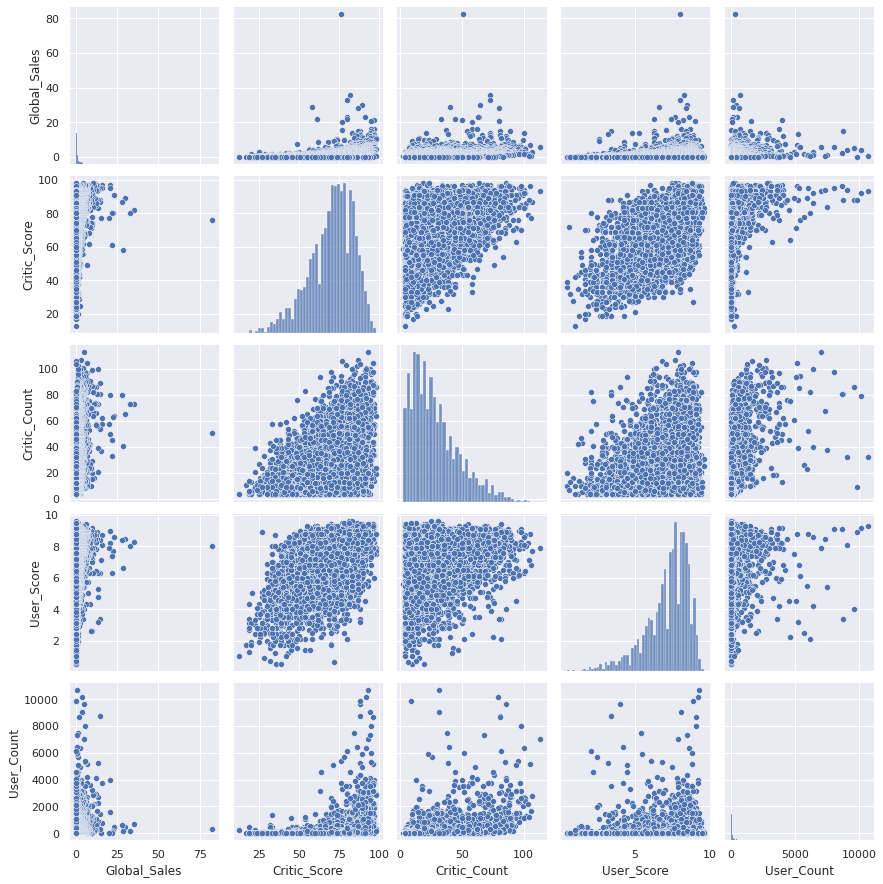

In [ ]:
# `pairplot()` may become very slow with the SVG format
%config InlineBackend.figure_format = 'png' 
sns.pairplot(df[['Global_Sales', 'Critic_Score', 'Critic_Count', 
                 'User_Score', 'User_Count']]);

As you can see, the distribution histograms lie on the diagonal of the matrix. The remaining charts are scatter plots for the corresponding pairs of features.

#### distplot()

It is also possible to plot a distribution of observations with `seaborn`'s `distplot()`. For example, let's look at the distribution of critics' ratings: `Critic_Score`. By default, the plot displays a histogram and the [kernel density estimate](https://en.wikipedia.org/wiki/Kernel_density_estimation).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


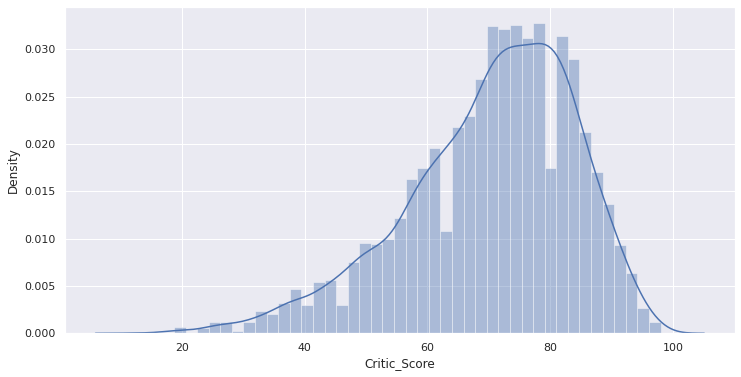

In [ ]:
#%config InlineBackend.figure_format = 'svg'
sns.distplot(df['Critic_Score']);

#### jointplot()

To look more closely at the relationship between two numerical variables, you can use *joint plot*, which is a cross between a scatter plot and histogram. Let's see how the `Critic_Score` and `User_Score` features are related.

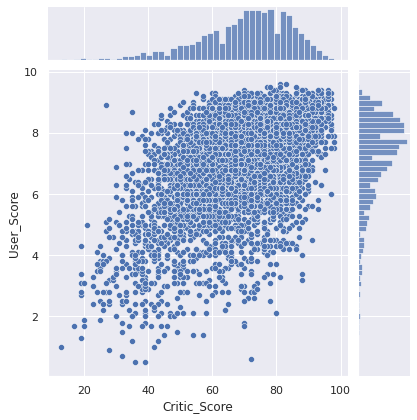

In [ ]:
sns.jointplot(x='Critic_Score', y='User_Score', 
              data=df, kind='scatter');

#### boxplot()

Another useful type of plot is a *box plot*. Let's compare critics' ratings for the top 5 biggest gaming platforms.

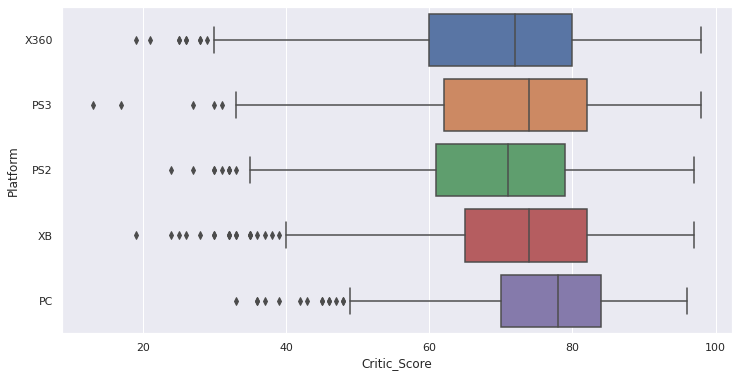

In [ ]:
top_platforms = df['Platform'].value_counts().sort_values(ascending=False).head(5).index.values
sns.boxplot(y="Platform", x="Critic_Score", 
            data=df[df['Platform'].isin(top_platforms)], orient="h");

It is worth spending a bit more time to discuss how to interpret a box plot. Its components are a *box* (obviously, this is why it is called a *box plot*), the so-called *whiskers*, and a number of individual points (*outliers*).

The box by itself illustrates the interquartile spread of the distribution; its length determined by the $25\% \, (\text{Q1})$ and $75\% \, (\text{Q3})$ percentiles. The vertical line inside the box marks the median ($50\%$) of the distribution. 

The whiskers are the lines extending from the box. They represent the entire scatter of data points, specifically the points that fall within the interval $(\text{Q1} - 1.5 \cdot \text{IQR}, \text{Q3} + 1.5 \cdot \text{IQR})$, where $\text{IQR} = \text{Q3} - \text{Q1}$ is the [interquartile range](https://en.wikipedia.org/wiki/Interquartile_range).

Outliers that fall out of the range bounded by the whiskers are plotted individually.

#### heatmap()

The last type of plot that we will cover here is a *heat map*. A heat map allows you to view the distribution of a numerical variable over two categorical ones. Let’s visualize the total sales of games by genre and gaming platform.

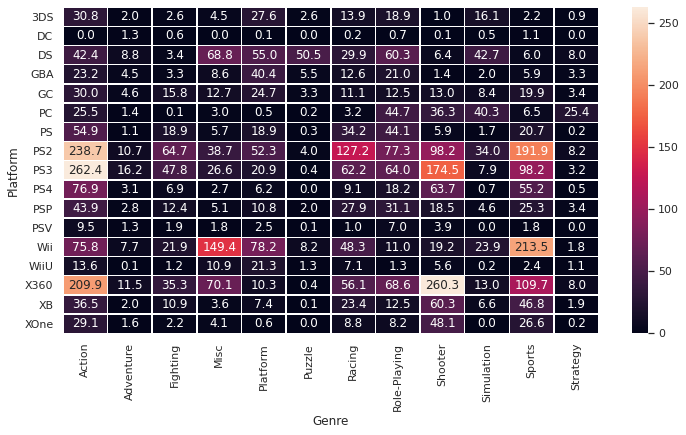

In [ ]:
platform_genre_sales = df.pivot_table(
                        index='Platform', 
                        columns='Genre', 
                        values='Global_Sales', 
                        aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=.5);

# 4. Simpsons_Paradox

## Understanding Simpson’s Paradox from a real life example:
In 2014, at California State University, Stanley A. Taylor & Amy E. Mickel published a paper as “A Data Set and Discrimination case study”. Below is a gist of the paper and a visualization of the case study in Jupyter - Python Notebook.
A few years ago, number of years ago, an allegation of discrimination was made and supported by a univariate analysis that examined average annual expenditures on consumers by ethnicity. The analysis revealed that the average annual expenditures on Hispanic consumers was approximately one-third (⅓) of the average expenditures on White non-Hispanic consumers.
This finding was the catalyst for further investigation; subsequently, state legislators and department managers sought consulting services from a statistician (the lead author).
Understanding the concept of specific variation, the statistician looked for other potential sources of variation including age. A bivariate analysis examining ethnicity and age (divided into six age cohorts) revealed that ethnic discrimination did not exist. Moreover, in all but one of the age cohorts, the trend reversed where the average annual expenditures on White non-Hispanic consumers were less than the expenditures on Hispanic consumers—a classic example of Simpson’s paradox!

## Reference: https://www.kaggle.com/saicataram/simpson-s-paradox-in-python

In [87]:
## Load the data set:
test_df=pd.read_csv("data/californiaDDSDataV2.csv")

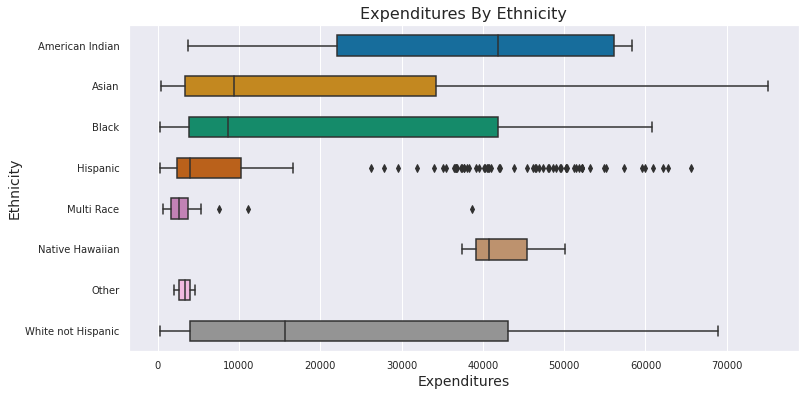

In [88]:
# A box plot for the above data is shown below.
bplot=sns.boxplot(y='Ethnicity', x='Expenditures', 
                 data=test_df.sort_values('Ethnicity'), 
                 width=0.5,
                 palette="colorblind")
bplot.axes.set_title("Expenditures By Ethnicity", fontsize=16) 
bplot.set_xlabel("Expenditures", fontsize=14)
bplot.set_ylabel("Ethnicity", fontsize=14) 
bplot.tick_params(labelsize=10)

From the above graph, it looks like there is discrimination towards multiple ethnic groups. Now, let us dive more into data using other features available in data set.

In [89]:
#Let us consider Age. We will use Age Cohort feature available in the data set.
test_df.loc[:,['Age Cohort', 'Expenditures']].groupby('Age Cohort').mean().sort_values('Expenditures')

,Expenditures
Age Cohort,
0 to 5,1415.280488
6 to 12,2226.862857
13 to 17,3922.613208
18 to 21,9888.537688
22 to 50,40209.283186
51+,53521.896226


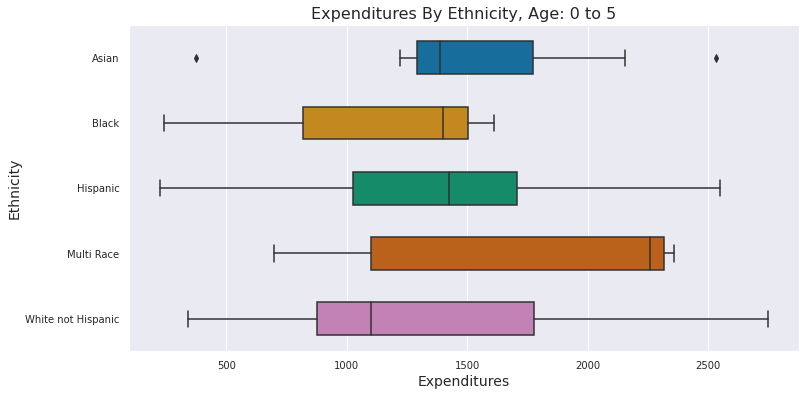

In [98]:
category = ['0 to 5','6 to 12','13 to 17','18 to 21','22 to 50','51+']
list_num = 0
df_sp = test_df.loc[:,['Age Cohort', 'Expenditures', 'Ethnicity']]
bplot=sns.boxplot(y='Ethnicity', x='Expenditures', 
                 data=df_sp.where(df_sp['Age Cohort'] == category[list_num]).dropna().sort_values('Ethnicity'), 
                 width=0.5,
                 palette="colorblind")
bplot.axes.set_title("Expenditures By Ethnicity, Age: {}".format(category[list_num]), fontsize=16) 
bplot.set_xlabel("Expenditures", fontsize=14)
bplot.set_ylabel("Ethnicity", fontsize=14) 
bplot.tick_params(labelsize=10)

This is a classic case of Simpson’s paradox as when the combined data been plotted has shown the discrimination. But when the data is broken down to different groups, this discrimination claim has been proven wrong.

# 5. Model_Interpretability
**SHAP (SHapley Additive exPlanations)**

Using SHAP to see the feature contribution to the target variable
TreeExplainer works with any sklear tree-based model & XGBoost, LightGBM, CatBoost. See the documentation for other model based approaches.

Library documentation:
https://shap.readthedocs.io/en/latest/
https://github.com/slundberg/shap#citations

Shapely values are based on the cooperative game theory. There is a trade off with machine learning model complexity vs interpretability. Simple models are easier to understand but they are often not as accurate at predicting the target variable. More complicated models have a higher accuracy, but they are notorious of being 'black boxes' which makes understanding the outcome difficult. Python SHAP library is an easy to use visual library that facilitates our understanding about feature importance and impact direction (positive/negative) to our target variable both globally and for an individual observation.
in Colab:
!pip install shap
On your local machine:
pip install shap
or
conda install -c conda-forge shap

Reference: https://github.com/helenaEH/SHAP_tutorial

In [ ]:
!pip install shap

     |████████████████████████████████| 327kB 4.9MB/s 
  Created wheel for shap: filename=shap-0.36.0-cp36-cp36m-linux_x86_64.whl size=456462 sha256=0d021d26457ceb2d3cc841cb663ab3433c2c27f646ddba4e09963abe82330a5c
  Stored in directory: /root/.cache/pip/wheels/fb/15/e1/8f61106790da27e0765aaa6e664550ca2c50ea339099e799f4
Successfully built shap


In [ ]:
import shap
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score

## Step 1: Load dataset from sklearn as a dataframe

In [ ]:
boston = load_boston()

# Create a Pandas dataframe with all the features
X = pd.DataFrame(data = boston['data'], columns = boston['feature_names'])
y = boston['target']

In [ ]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


## Step 2: Split the data into train and test datasets, and Train with Random Forest

In [ ]:
# Split the data
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)
# Initiate and fit a Random Forest Regressor 
rf_reg = RandomForestRegressor(n_estimators=100)
rf_reg.fit(Xtrain, ytrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

## Step 3: Evaluate the trained model with test dataset

In [ ]:
rf_train = rf_reg.score(Xtrain, ytrain)
rf_cv = cross_val_score(rf_reg, Xtrain, ytrain, cv=5).mean()
rf_test = rf_reg.score(Xtest, ytest)
print('Evaluation of the Random Forest performance\n')
print(f'Training score: {rf_train.round(4)}')
print(f'Cross validation score: {rf_cv.round(4)}')
print(f'Test score: {rf_test.round(4)}')

Evaluation of the Random Forest performance

Training score: 0.9796
Cross validation score: 0.8535
Test score: 0.88


## SHAP Values

In [ ]:
# Initialize JavaScript visualization - use Jupyter notebook to see the interactive features of the plots
shap.initjs()
# Create a TreeExplainer and extract shap values from it - will be used for plotting later
explainer = shap.TreeExplainer(rf_reg)
shap_values = explainer.shap_values(X)

## Features importance with SHAP values

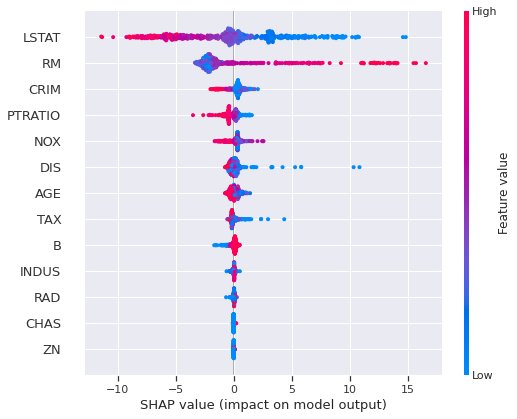

In [81]:
# See the absolute shap value of how each feaure contributes to the model output

shap.summary_plot(shap_values, X)

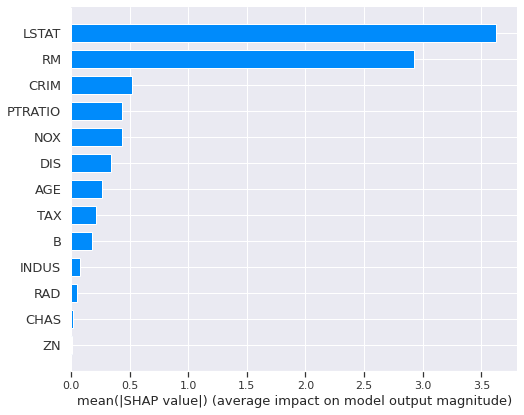

In [ ]:
shap.summary_plot(shap_values, X, plot_type="bar")

## Investigate each single feature on the shap value

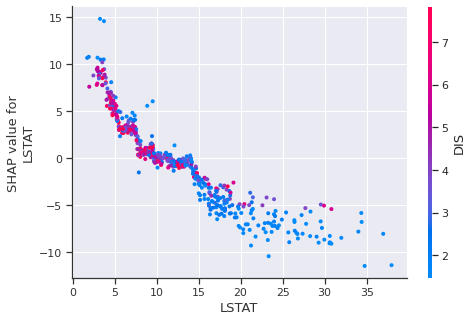

In [ ]:
# Effect of a single feature on the shap value,and automatically selected other feature to show dependence 
#feature = 'RM'
feature = 'LSTAT'
shap.dependence_plot(feature, shap_values, X)

In [ ]:
# shap force plot for the first prediction. Here we want to interpret the output value for the each observation in our dataframe. 
shap.initjs()
row_n = 0
shap.force_plot(explainer.expected_value, shap_values[row_n,:], X.iloc[row_n,:])

In [ ]:
shap.initjs()
# SHAP values for all predictions and the direction of their impact
shap.force_plot(explainer.expected_value, shap_values, X)